<a href="https://colab.research.google.com/github/feby715/pdecode/blob/main/Exp3B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Application Challenge: Vibration in a Flexible Robot Link
In modern robotics, lightweight materials are used to create fast and efficient robots. However, these materials are often flexible. When a motor at the base of a robot link starts or stops suddenly, it can induce a longitudinal (compression/expansion) wave that travels down the link, causing vibrations at the end-effector (the robot’s tool or gripper). This vibration can severely impact the robot’s precision.

We can model this phenomenon using the 1D wave equation, where u(x,t) now represents the longitudinal displacement of the material from its resting position.

--- Robotics Challenge Parameters ---
Wave Speed c = 50.0 m/s
Courant Number C = 0.90


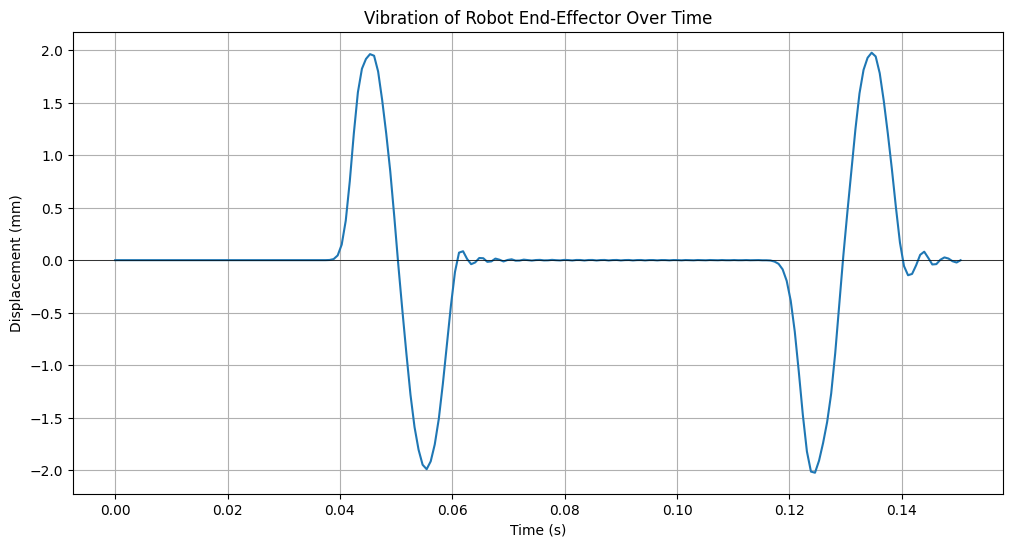

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Parameters for the Robot Link ---
L = 2.0             # Length of the robot link (m)
c = 50.0            # Wave speed in the material (m/s)
T = 0.15            # Total simulation time (s)

# Discretization - fine grid needed for high wave speed
dx = 0.04
# dt must be chosen carefully for stability
dt = dx / c * 0.9   # Choose dt based on dx and c to guarantee C=0.9
C = c * dt / dx

print(f"--- Robotics Challenge Parameters ---")
print(f"Wave Speed c = {c} m/s")
print(f"Courant Number C = {C:.2f}")
if C > 1:
    raise ValueError("CFL condition failed!")

# --- Grid setup ---
x = np.arange(0, L + dx, dx)
t_vec = np.arange(0, T + dt, dt)
nx = len(x)
nt = len(t_vec)
u = np.zeros((nt, nx))

# --- Motor Jolt Parameters ---
pulse_duration = 0.02  # s
pulse_amplitude = 0.001 # 1 mm jolt
pulse_frequency = 2 * np.pi / pulse_duration

# --- 5. Time-stepping Loop with New Boundary Conditions ---
for n in range(1, nt - 1):
    # Main update for interior points (from 2nd point to 2nd-to-last)
    u[n + 1, 1:-1] = (2 * u[n, 1:-1] - u[n - 1, 1:-1] +
                      C**2 * (u[n, 2:] - 2 * u[n, 1:-1] + u[n, :-2]))

    # Boundary Condition 1: Motor Jolt at the Base (x=0)
    current_time = n * dt
    if current_time < pulse_duration:
        u[n + 1, 0] = pulse_amplitude * np.sin(pulse_frequency * current_time)
    else:
        u[n + 1, 0] = 0.0 # Motor holds firm at base after jolt

    # Boundary Condition 2: Free End at x=L (Neumann)
    # u_last = u_second_to_last
    u[n + 1, -1] = u[n + 1, -2]

# --- 6. Plot the End-Effector's Vibration ---
end_effector_displacement = u[:, -1]

plt.figure(figsize=(12, 6))
plt.plot(t_vec, end_effector_displacement * 1000) # Convert to mm
plt.title("Vibration of Robot End-Effector Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (mm)")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5) # Zero line
plt.show()

## 3D plot of the solution

--- Robotics Challenge Parameters ---
Wave Speed c = 50.0 m/s
Courant Number C = 0.90


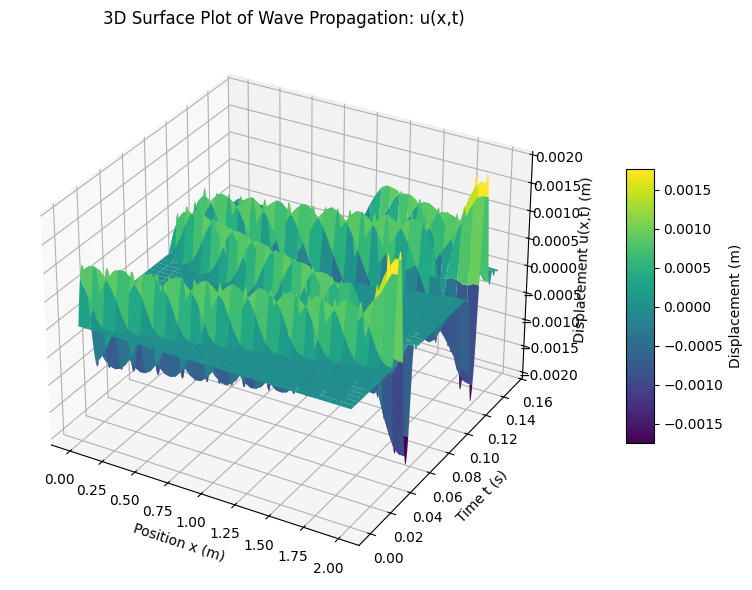

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- 1. Parameters for the Robot Link ---
L = 2.0             # Length of the robot link (m)
c = 50.0            # Wave speed in the material (m/s)
T = 0.15            # Total simulation time (s)

# Discretization - fine grid needed for high wave speed
dx = 0.04
dt = dx / c * 0.9   # Choose dt based on dx and c to guarantee C=0.9
C = c * dt / dx

print(f"--- Robotics Challenge Parameters ---")
print(f"Wave Speed c = {c} m/s")
print(f"Courant Number C = {C:.2f}")
if C > 1:
    raise ValueError("CFL condition failed!")

# --- Grid setup ---
x = np.arange(0, L + dx, dx)
t_vec = np.arange(0, T + dt, dt)
nx = len(x)
nt = len(t_vec)
u = np.zeros((nt, nx))

# --- Motor Jolt Parameters ---
pulse_duration = 0.02  # s
pulse_amplitude = 0.001 # 1 mm jolt
pulse_frequency = 2 * np.pi / pulse_duration

# --- 5. Time-stepping Loop with New Boundary Conditions ---
for n in range(1, nt - 1):
    # Main update for interior points (from 2nd point to 2nd-to-last)
    u[n + 1, 1:-1] = (2 * u[n, 1:-1] - u[n - 1, 1:-1] +
                      C**2 * (u[n, 2:] - 2 * u[n, 1:-1] + u[n, :-2]))

    # Boundary Condition 1: Motor Jolt at the Base (x=0)
    current_time = n * dt
    if current_time < pulse_duration:
        u[n + 1, 0] = pulse_amplitude * np.sin(pulse_frequency * current_time)
    else:
        u[n + 1, 0] = 0.0  # Motor holds firm at base after jolt

    # Boundary Condition 2: Free End at x=L (Neumann)
    u[n + 1, -1] = u[n + 1, -2]

# --- 6. 2D Plot: End-Effector's Vibration Over Time ---
end_effector_displacement = u[:, -1]

# --- 7. 3D Surface Plot of u(x,t) ---
X, T_grid = np.meshgrid(x, t_vec)

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T_grid, u, cmap='viridis', edgecolor='none')

ax.set_title("3D Surface Plot of Wave Propagation: u(x,t)")
ax.set_xlabel("Position x (m)")
ax.set_ylabel("Time t (s)")
ax.set_zlabel("Displacement u(x,t) (m)")
fig.colorbar(surf, shrink=0.5, aspect=10, label='Displacement (m)')
plt.tight_layout()
plt.show()